In [1]:
import kagglehub
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
!python --version

Python 3.11.9


In [3]:
# DOWNLOAD DO KAGGLE
# Set kagglehub cache to local datasets folder
os.environ['KAGGLEHUB_CACHE'] = os.path.abspath('')

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")
print("Path to dataset files:", path)

Path to dataset files: d:\post-graduate\clusterizacao\notebooks\datasets\rohan0301\unsupervised-learning-on-country-data\versions\2


In [4]:
# Lendo o dataset
df = pd.read_csv(path + '/Country-data.csv')
print(f"Total de países únicos: {df['country'].nunique()}")


Total de países únicos: 167


# Análise exploratória

In [5]:
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.shape

(167, 10)

In [8]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [9]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

## Visualização em Gráficos

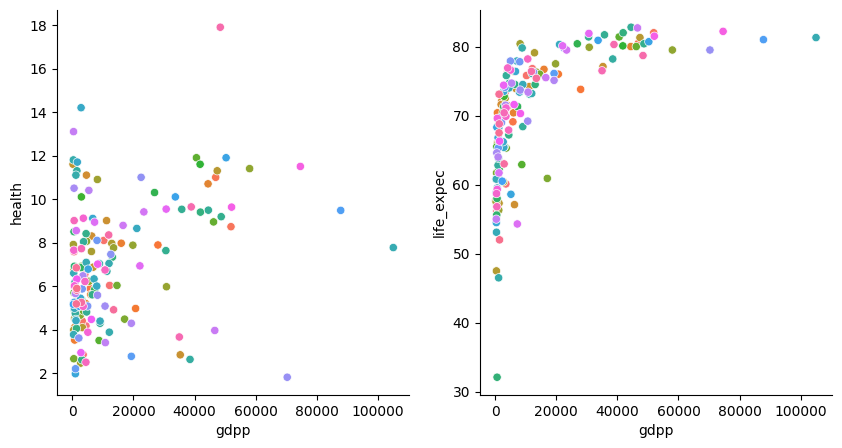

In [10]:
# #----------Seaborn Scatter Plot----------
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.scatterplot(data=df, x='gdpp', y='health', hue='country', ax=ax[0], legend=False)
sns.scatterplot(data=df, x='gdpp', y='life_expec', hue='country', ax=ax[1], legend=False)
sns.despine()
plt.show()

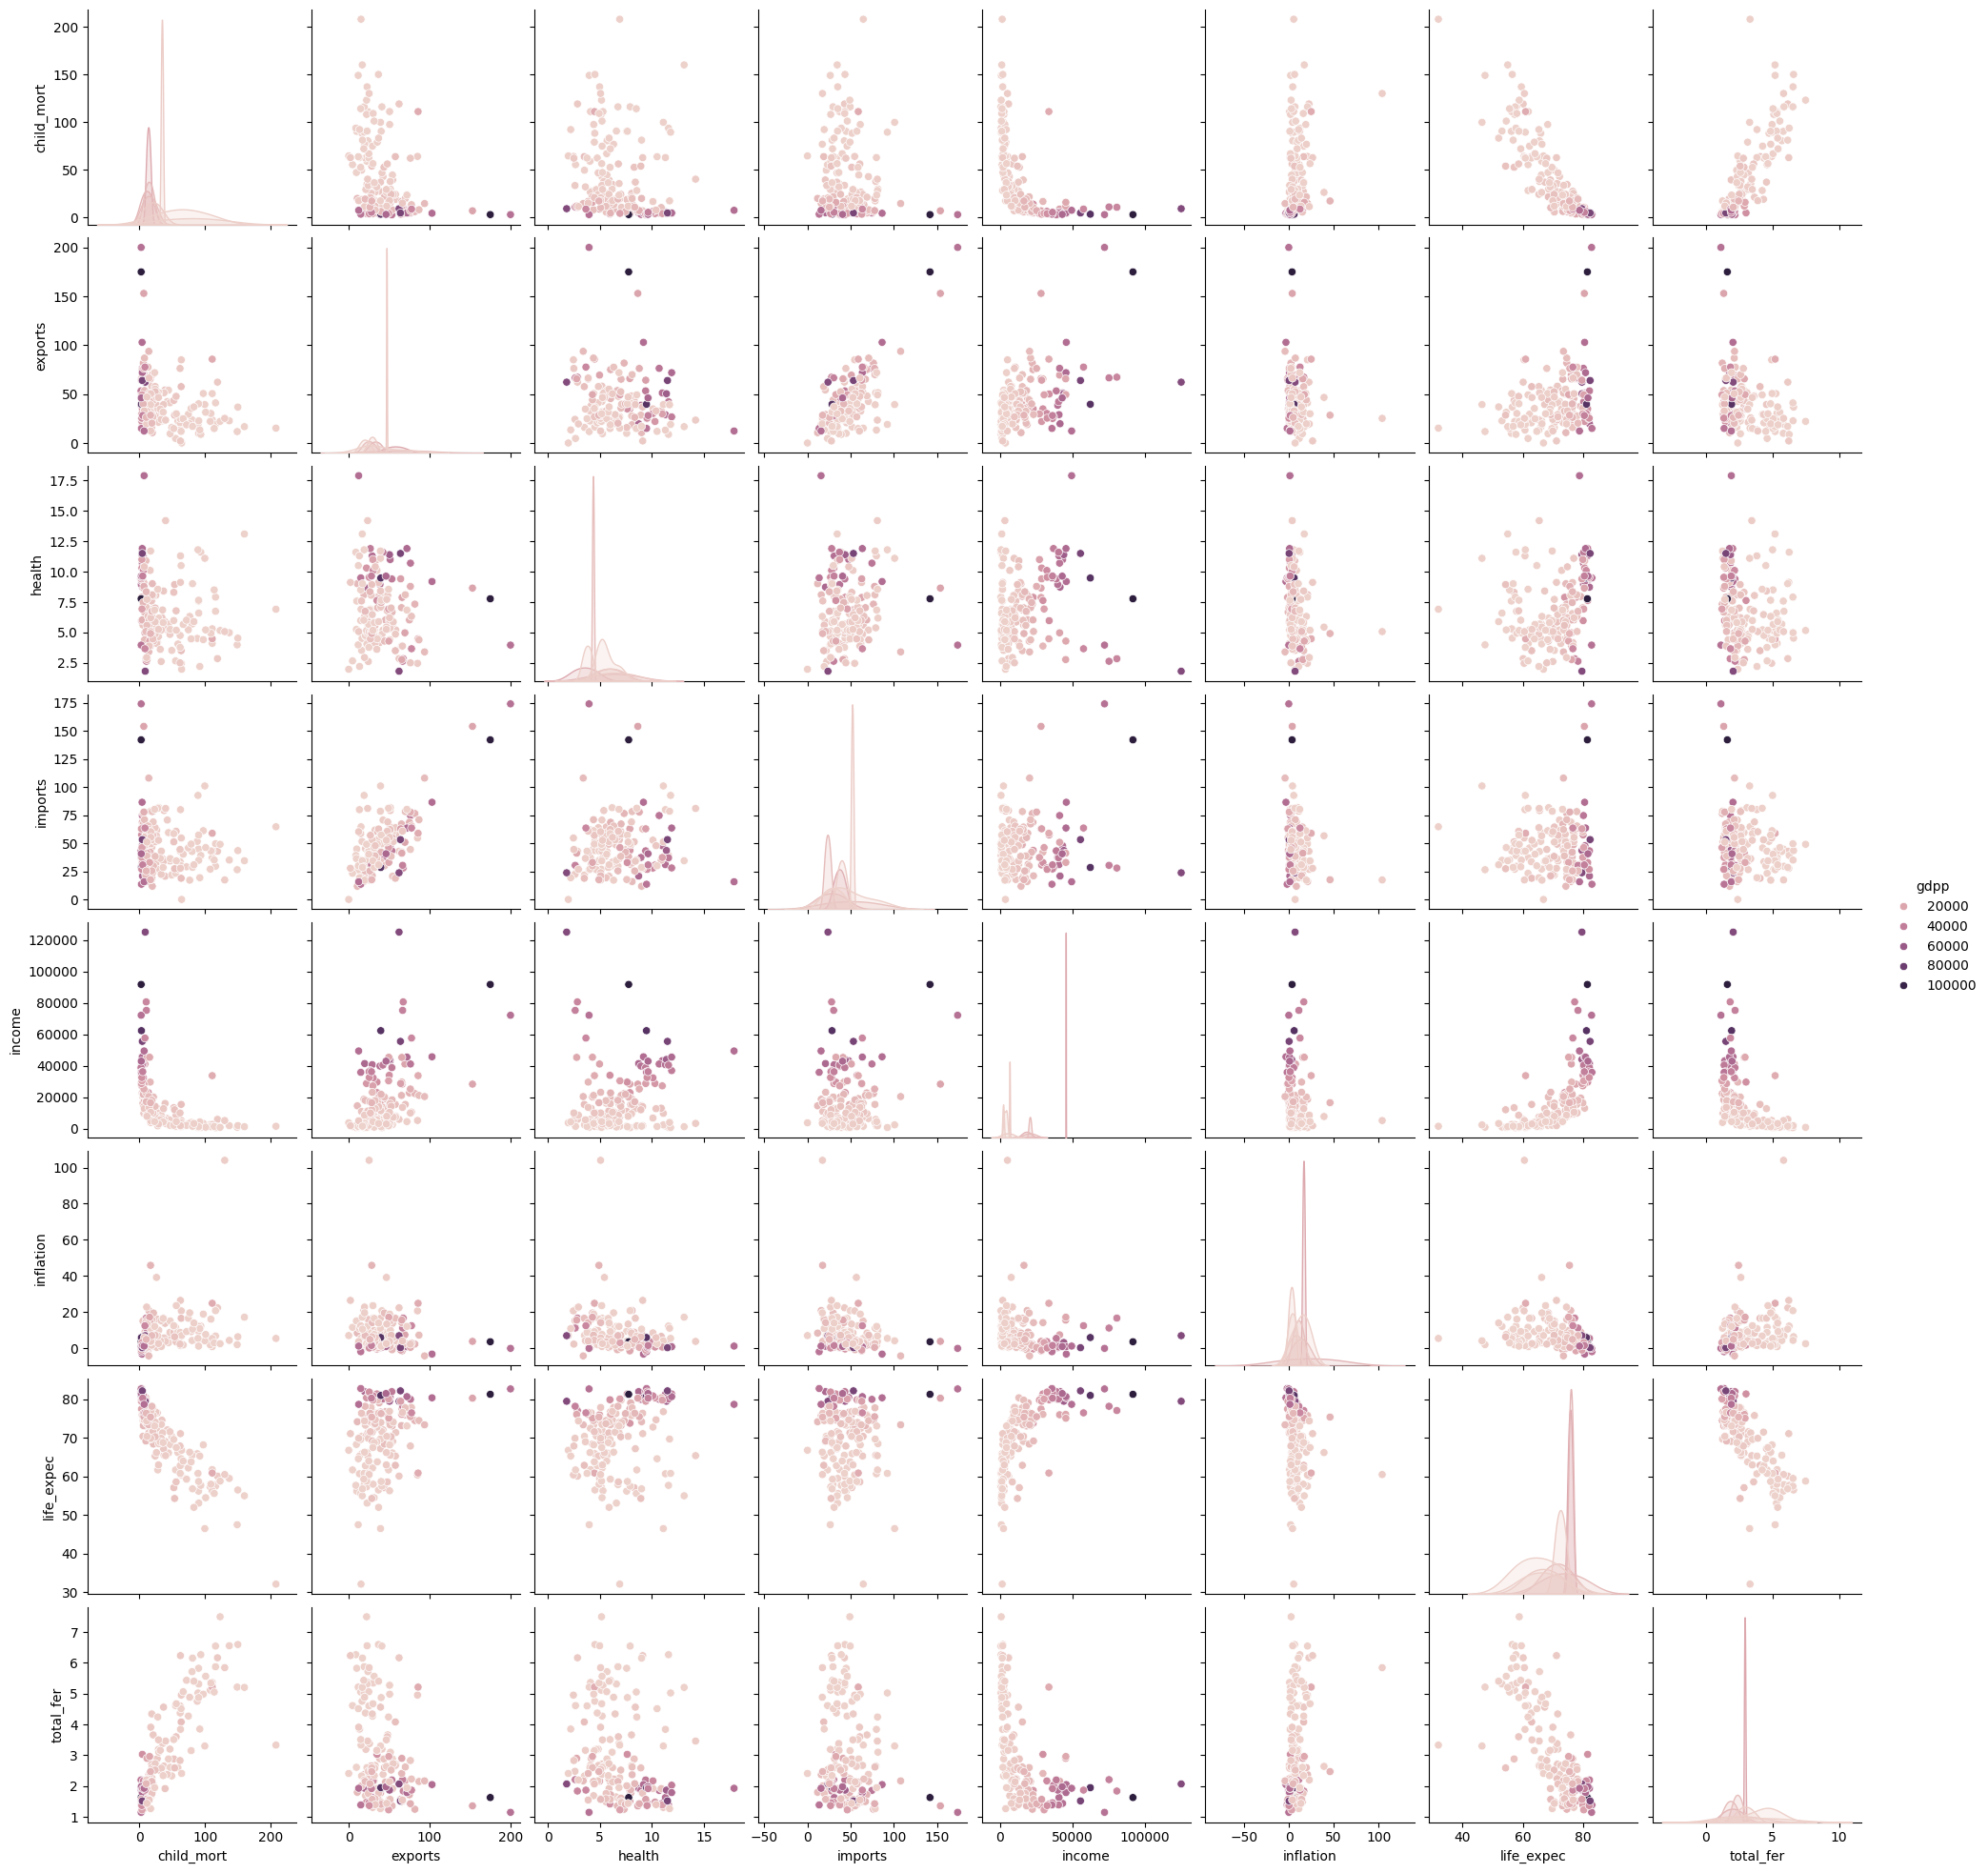

In [11]:
sns.pairplot(data=df.iloc[:, 1:], hue='gdpp')

plt.show()

In [12]:
fig = px.scatter_matrix(df, dimensions=['gdpp', 'health', 'life_expec', 'child_mort'],
                        hover_name='country', color='country')

fig.show()

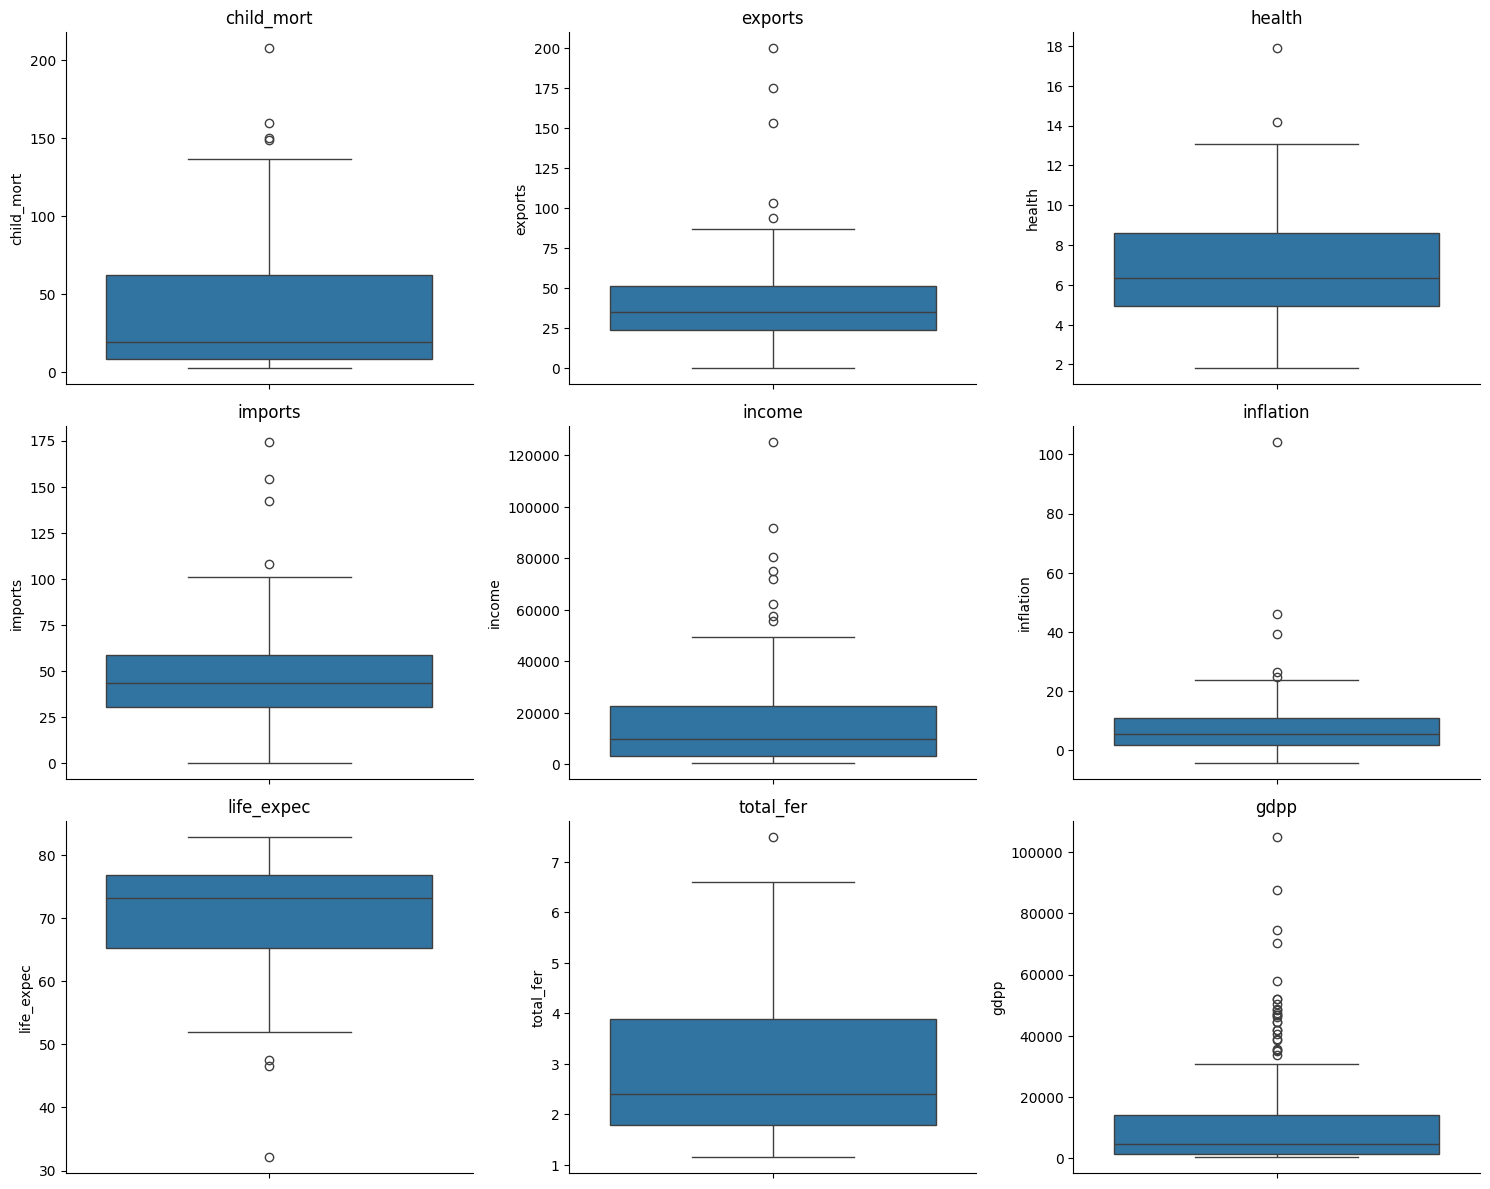

In [13]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = len(numeric_cols)

f, ax = plt.subplots(3, 3, figsize=(15, 12))
ax = ax.flatten()

for i, column in enumerate(numeric_cols):
    sns.boxplot(data=df, y=column, ax=ax[i])
    ax[i].set_title(column)

sns.despine()
plt.tight_layout()
plt.show()

Pela faixa dinâmica e pelas escalas é possível notar discrepância e necessidade de padronização dos dados:

In [14]:
print("\nFaixa dinâmica (max - min):")
print(df[numeric_cols].max() - df[numeric_cols].min())


Faixa dinâmica (max - min):
child_mort       205.4000
exports          199.8910
health            16.0900
imports          173.9341
income        124391.0000
inflation        108.2100
life_expec        50.7000
total_fer          6.3400
gdpp          104769.0000
dtype: float64


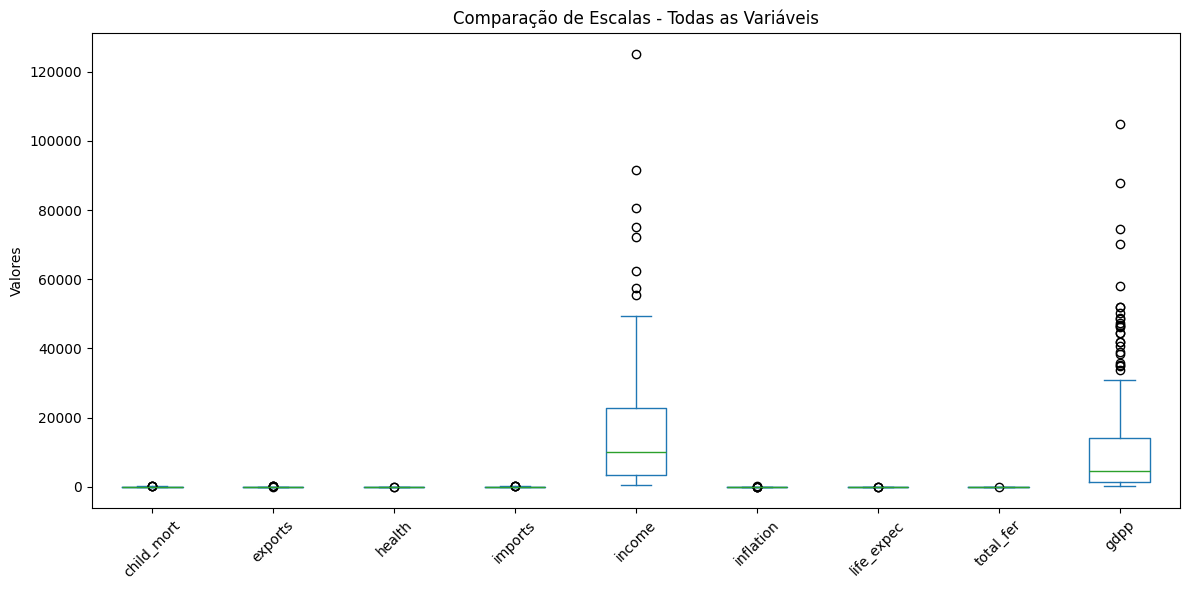

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
df[numeric_cols].plot(kind='box', ax=ax)
plt.xticks(rotation=45)
plt.title('Comparação de Escalas - Todas as Variáveis')
plt.ylabel('Valores')
plt.tight_layout()
plt.show()

## Relatório com YData

### Imports e Configurações

In [16]:
from ydata_profiling import ProfileReport

In [17]:
profile = ProfileReport(df, title="Dataset Countries Profiling Report")

### Relatório

In [18]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 10000.72it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Padronização

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[numeric_cols])
df_padronized = pd.DataFrame(data_scaled, columns=numeric_cols)

if 'country' in df.columns:
    df_padronized.insert(0, 'country', df['country'])

df_padronized.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1              Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2              Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3               Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4  Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   

   inflation  life_expec  total_fer      gdpp  
0   0.157336   -1.619092   1.902882 -0.679180  
1  -0.312347    0.647866  -0.859973 -0.485623  
2   0.789274    0.670423  -0.038404 -0.465376  
3   1.387054   -1.179234   2.128151 -0.516268  
4  -0.601749    0.704258  -0.541946 -0.041817

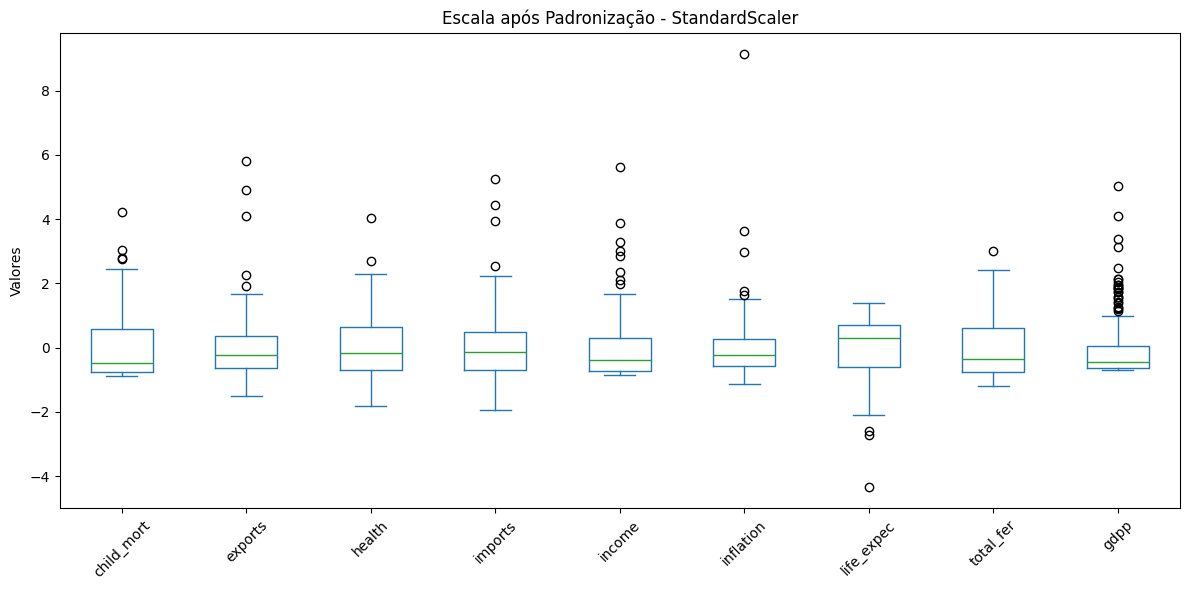

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
df_padronized[numeric_cols].plot(kind='box', ax=ax)
plt.xticks(rotation=45)
plt.title('Escala após Padronização - StandardScaler')
plt.ylabel('Valores')
plt.tight_layout()
plt.show()

# K-Médias

### Scikit Learn

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [24]:
df_padronized['cluster_kmeans'] = kmeans.labels_
df_padronized.head(2)

country  child_mort   exports    health   imports    income  inflation  \
0  Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1      Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   

   life_expec  total_fer      gdpp  cluster_kmeans  
0   -1.619092   1.902882 -0.679180               2  
1    0.647866  -0.859973 -0.485623               0

In [25]:
df_padronized['cluster_kmeans'].value_counts()

cluster_kmeans
0    86
2    45
1    36
Name: count, dtype: int64

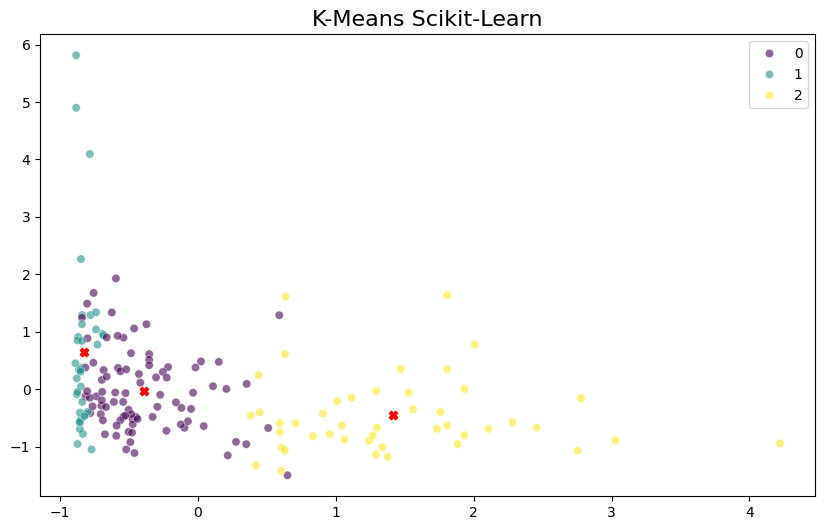

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x=data_scaled[:,0], y=data_scaled[:,1], hue=kmeans.labels_, palette='viridis', alpha=0.6, ax=ax)
ax.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    marker='X',
    color='red',
)
ax.set_title('K-Means Scikit-Learn', fontsize=16)

plt.show()

### Representação em Mapa

In [27]:
# Visualizar mapa
fig = px.choropleth(
    df_padronized,
    locations='country',
    locationmode='country names',
    color='cluster_kmeans',
    hover_name='country',
    hover_data={
        'cluster_kmeans': True,
        'income': ':,.0f',
        'gdpp': ':,.0f',
        'child_mort': ':.1f',
        'life_expec': ':.1f',
        'health': ':.1f'
    },
    color_continuous_scale='Viridis',
    title='<b>Clustering de Países - K-Means</b>',
    labels={'cluster_kmeans': 'Cluster'}
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        coastlinecolor='white',
        projection_type='natural earth',
        bgcolor='rgba(0,0,0,0)'
    ),
    width=1000,
    height=600,
    font=dict(size=14),
    title_x=0.5
)

fig.show()

# Análise dos clusters
print("\n" + "="*70)
print("ANÁLISE DOS CLUSTERS - K-Means")
print("="*70)

for i in sorted(df_padronized['cluster_kmeans'].unique()):
    cluster_df = df_padronized[df_padronized['cluster_kmeans'] == i]
    n_countries = len(cluster_df)
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {i} - {n_countries} países ({n_countries/len(df_padronized)*100:.1f}%)")
    print(f"{'='*70}")
    
    if 'country' in df_padronized.columns:
        print(f"\nPaíses:")
        countries = cluster_df['country'].tolist()
        for j in range(0, len(countries), 5):
            print(f"  {', '.join(countries[j:j+5])}")
    
    print(f"\nMédias das variáveis:")
    print(cluster_df[numeric_cols].mean().round(2))

C:\Users\caahs\AppData\Local\Temp\ipykernel_4060\3562669020.py:2: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.




ANÁLISE DOS CLUSTERS - K-Means

CLUSTER 0 - 86 países (51.5%)

Países:
  Albania, Algeria, Antigua and Barbuda, Argentina, Armenia
  Azerbaijan, Bahamas, Bangladesh, Barbados, Belarus
  Belize, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana
  Brazil, Bulgaria, Cambodia, Cape Verde, Chile
  China, Colombia, Costa Rica, Croatia, Dominican Republic
  Ecuador, Egypt, El Salvador, Estonia, Fiji
  Georgia, Grenada, Guatemala, Guyana, Hungary
  India, Indonesia, Iran, Iraq, Jamaica
  Jordan, Kazakhstan, Kyrgyz Republic, Latvia, Lebanon
  Libya, Lithuania, Macedonia, FYR, Malaysia, Maldives
  Mauritius, Micronesia, Fed. Sts., Moldova, Mongolia, Montenegro
  Morocco, Myanmar, Nepal, Oman, Panama
  Paraguay, Peru, Philippines, Poland, Romania
  Russia, Samoa, Saudi Arabia, Serbia, Seychelles
  Solomon Islands, Sri Lanka, St. Vincent and the Grenadines, Suriname, Tajikistan
  Thailand, Tonga, Tunisia, Turkey, Turkmenistan
  Ukraine, Uruguay, Uzbekistan, Vanuatu, Venezuela
  Vietnam

Médias da

# Clusterização Hierárquica

In [28]:
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering

In [29]:
dm_sk = pairwise_distances(df_padronized[numeric_cols], metric='euclidean')
dm_sk

array([[0.00000000e+00, 4.14334580e+00, 3.89755192e+00, ...,
        4.51909177e+00, 2.49752689e+00, 1.49113306e+00],
       [4.14334580e+00, 0.00000000e+00, 1.84174508e+00, ...,
        2.26701658e+00, 3.15544023e+00, 4.25190018e+00],
       [3.89755192e+00, 1.84174508e+00, 2.98023224e-08, ...,
        2.73124742e+00, 1.97873559e+00, 3.61130935e+00],
       ...,
       [4.51909177e+00, 2.26701658e+00, 2.73124742e+00, ...,
        0.00000000e+00, 3.44101280e+00, 4.36679080e+00],
       [2.49752689e+00, 3.15544023e+00, 1.97873559e+00, ...,
        3.44101280e+00, 0.00000000e+00, 2.17296707e+00],
       [1.49113306e+00, 4.25190018e+00, 3.61130935e+00, ...,
        4.36679080e+00, 2.17296707e+00, 0.00000000e+00]])

In [30]:
from scipy.cluster import hierarchy

### Single Linkage

In [31]:
single_linkage = hierarchy.linkage(
    df_padronized[numeric_cols],
    method='single',
    metric='euclidean'
)
single_linkage

array([[4.10000000e+01, 1.21000000e+02, 2.70510920e-01, 2.00000000e+00],
       [7.50000000e+01, 1.39000000e+02, 3.45939626e-01, 2.00000000e+00],
       [2.40000000e+01, 8.50000000e+01, 4.23131474e-01, 2.00000000e+00],
       [1.58000000e+02, 1.68000000e+02, 4.44395323e-01, 3.00000000e+00],
       [6.00000000e+01, 1.70000000e+02, 4.87069892e-01, 4.00000000e+00],
       [1.11000000e+02, 1.71000000e+02, 4.94330379e-01, 5.00000000e+00],
       [9.20000000e+01, 1.69000000e+02, 5.15096219e-01, 3.00000000e+00],
       [1.00000000e+02, 1.73000000e+02, 5.16371769e-01, 4.00000000e+00],
       [1.22000000e+02, 1.72000000e+02, 5.44105161e-01, 6.00000000e+00],
       [1.00000000e+00, 4.80000000e+01, 5.59540632e-01, 2.00000000e+00],
       [5.30000000e+01, 1.44000000e+02, 5.68799380e-01, 2.00000000e+00],
       [2.90000000e+01, 5.40000000e+01, 5.90319960e-01, 2.00000000e+00],
       [1.30000000e+01, 1.67000000e+02, 5.99154033e-01, 3.00000000e+00],
       [2.00000000e+01, 1.30000000e+02, 6.04562360e

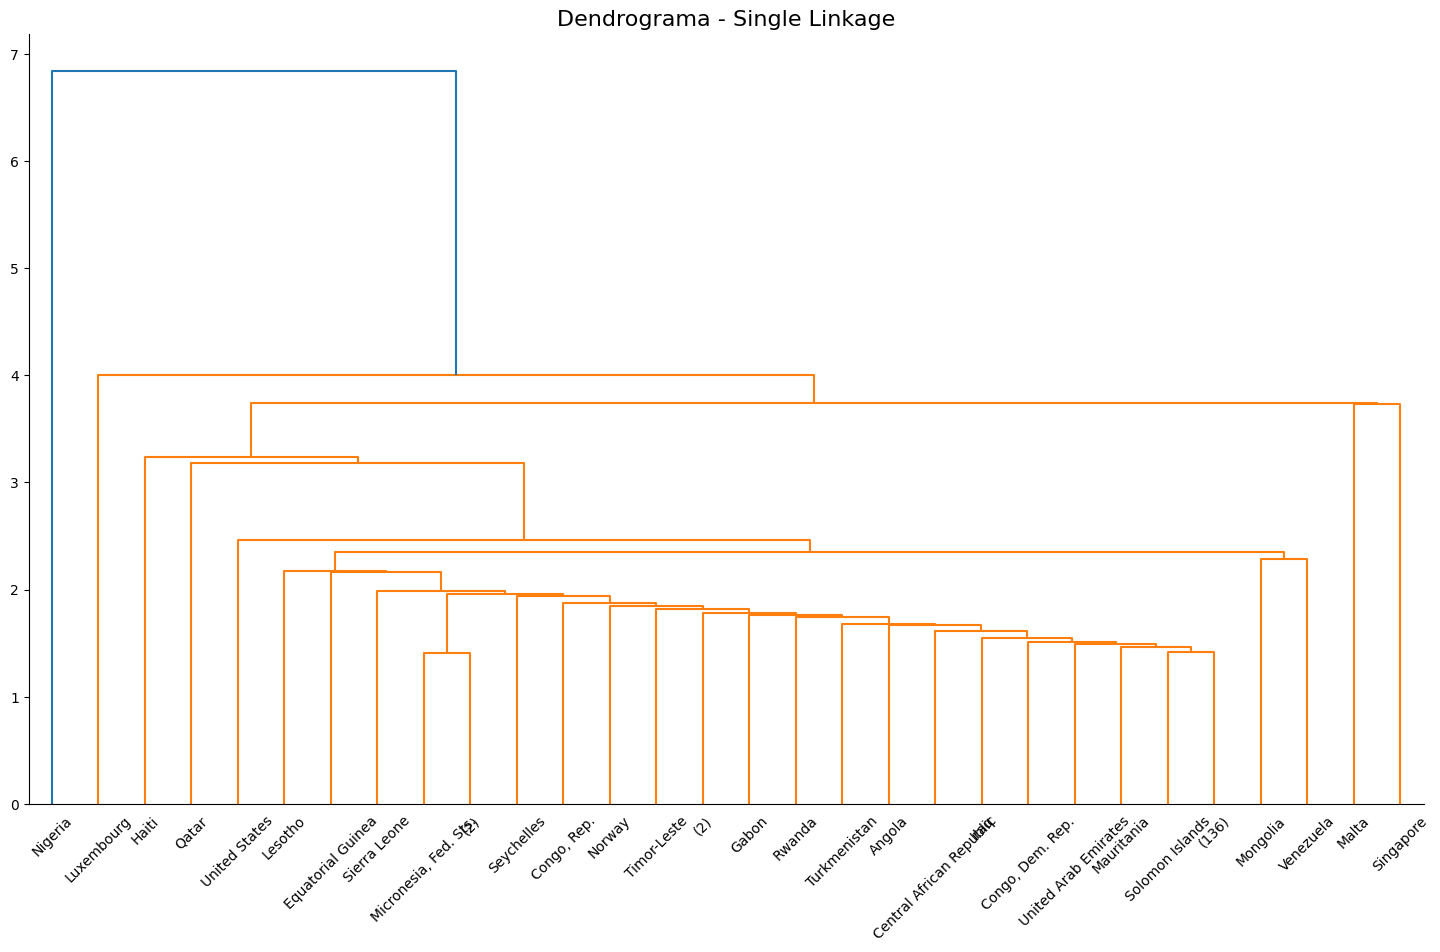

In [32]:
f, ax = plt.subplots(figsize=(18, 10))

hierarchy.dendrogram(
    single_linkage,
    labels=df_padronized['country'].values,
    ax=ax,
    orientation='top',
    distance_sort=True,
    truncate_mode='lastp',
)

ax.set_title('Dendrograma - Single Linkage', fontsize=16)

sns.despine()
plt.show()

In [33]:
cluster_single_linkage = AgglomerativeClustering(n_clusters=3, linkage='single', metric='euclidean')
cluster_single_linkage.fit(df_padronized[numeric_cols])

AgglomerativeClustering(linkage='single', n_clusters=3)

In [34]:
df_padronized['cluster_single_linkage'] = cluster_single_linkage.labels_
df_padronized['cluster_single_linkage'].value_counts()


cluster_single_linkage
0    165
2      1
1      1
Name: count, dtype: int64

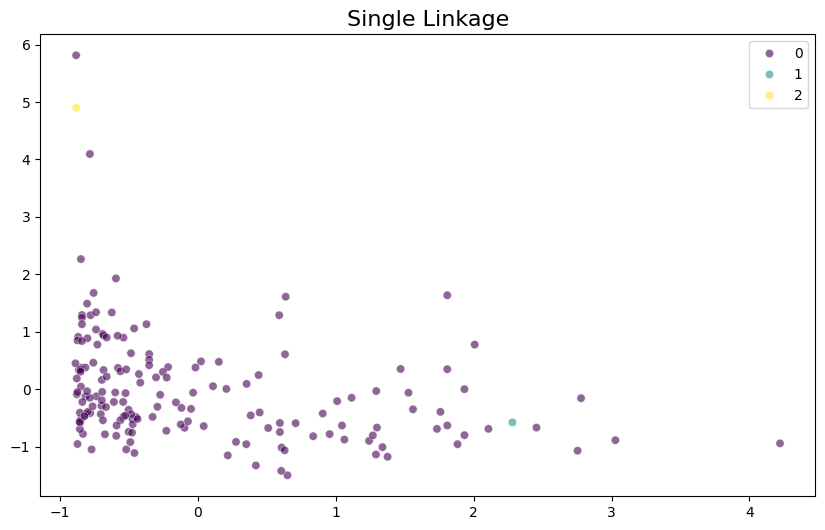

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x=data_scaled[:,0], y=data_scaled[:,1], hue=cluster_single_linkage.labels_, palette='viridis', alpha=0.6, ax=ax)
ax.set_title('Single Linkage', fontsize=16)

plt.show()

### Complete Linkage

In [36]:
complete_linkage = hierarchy.linkage(
    df_padronized[numeric_cols],
    method='complete',
    metric='euclidean'
)
complete_linkage

array([[4.10000000e+01, 1.21000000e+02, 2.70510920e-01, 2.00000000e+00],
       [7.50000000e+01, 1.39000000e+02, 3.45939626e-01, 2.00000000e+00],
       [2.40000000e+01, 8.50000000e+01, 4.23131474e-01, 2.00000000e+00],
       [1.11000000e+02, 1.58000000e+02, 4.94330379e-01, 2.00000000e+00],
       [1.00000000e+02, 1.69000000e+02, 5.39700004e-01, 3.00000000e+00],
       [6.00000000e+01, 1.22000000e+02, 5.44105161e-01, 2.00000000e+00],
       [1.00000000e+00, 4.80000000e+01, 5.59540632e-01, 2.00000000e+00],
       [5.30000000e+01, 1.44000000e+02, 5.68799380e-01, 2.00000000e+00],
       [2.90000000e+01, 5.40000000e+01, 5.90319960e-01, 2.00000000e+00],
       [2.00000000e+01, 1.30000000e+02, 6.04562360e-01, 2.00000000e+00],
       [6.00000000e+00, 7.60000000e+01, 6.13397046e-01, 2.00000000e+00],
       [1.30000000e+01, 1.67000000e+02, 6.15453682e-01, 3.00000000e+00],
       [5.60000000e+01, 1.29000000e+02, 6.27531275e-01, 2.00000000e+00],
       [4.30000000e+01, 1.35000000e+02, 6.39912838e

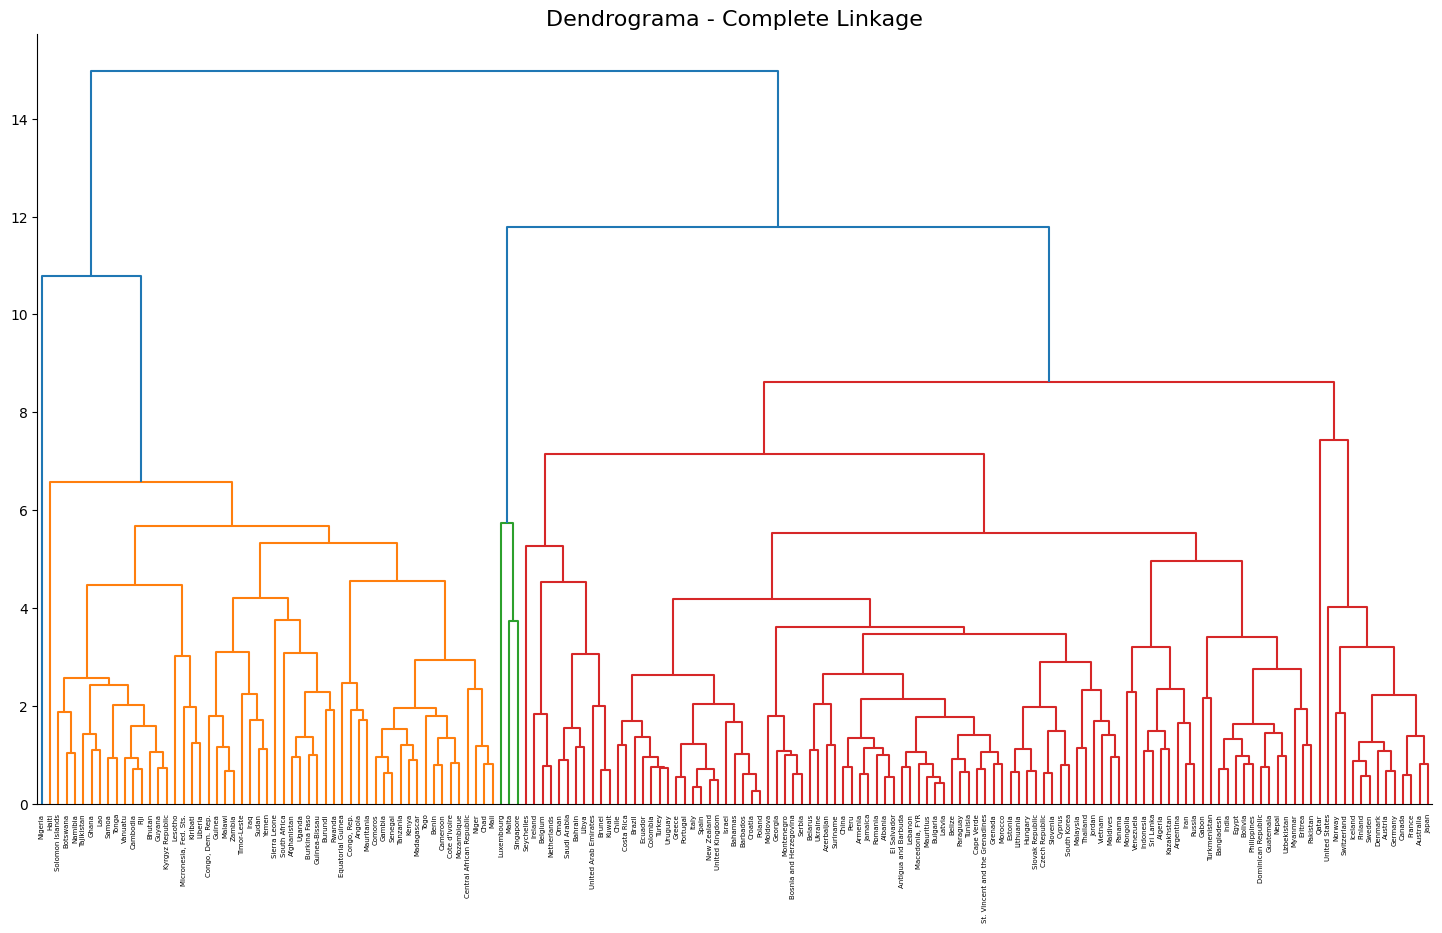

In [37]:
f, ax = plt.subplots(figsize=(18, 10))

hierarchy.dendrogram(
    complete_linkage,
    labels=df_padronized['country'].values,
    ax=ax,
    orientation='top',
    distance_sort=True,
    # truncate_mode='lastp',
)

ax.set_title('Dendrograma - Complete Linkage', fontsize=16)

sns.despine()
plt.show()

In [38]:
cluster_complete_linkage = AgglomerativeClustering(n_clusters=3, linkage='complete', metric='euclidean')
cluster_complete_linkage.fit(df_padronized[numeric_cols])

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [39]:
df_padronized['cluster_complete_linkage'] = cluster_complete_linkage.labels_
df_padronized['cluster_complete_linkage'].value_counts()

cluster_complete_linkage
1    109
0     55
2      3
Name: count, dtype: int64

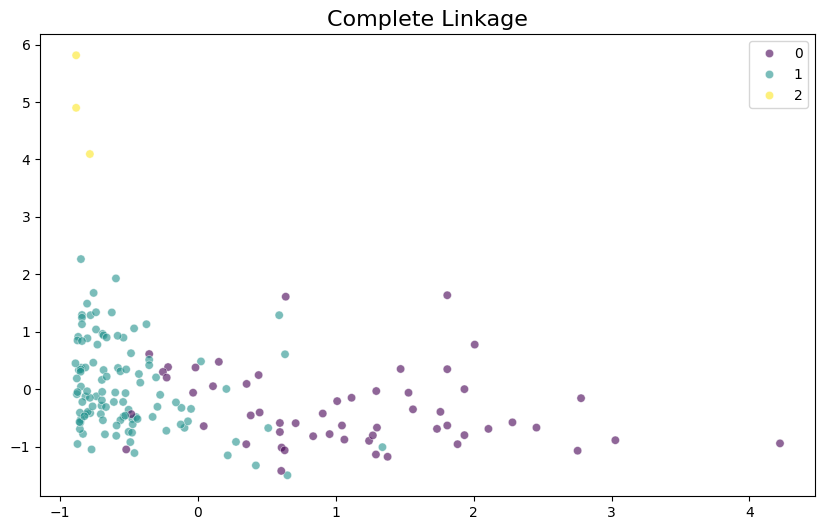

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x=data_scaled[:,0], y=data_scaled[:,1], hue=cluster_complete_linkage.labels_, palette='viridis', alpha=0.6, ax=ax)
ax.set_title('Complete Linkage', fontsize=16)

plt.show()

In [53]:
# Visualizar mapa
fig = px.choropleth(
    df_padronized,
    locations='country',
    locationmode='country names',
    color='cluster_complete_linkage',
    hover_name='country',
    hover_data={
        'cluster_complete_linkage': True,
        'income': ':,.0f',
        'gdpp': ':,.0f',
        'child_mort': ':.1f',
        'life_expec': ':.1f',
        'health': ':.1f'
    },
    color_continuous_scale='Viridis',
    title='<b>Clustering de Países - Complete Linkage</b>',
    labels={'cluster_complete_linkage': 'Cluster'}
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        coastlinecolor='white',
        projection_type='natural earth',
        bgcolor='rgba(0,0,0,0)'
    ),
    width=1000,
    height=600,
    font=dict(size=14),
    title_x=0.5
)

fig.show()

# Análise dos clusters
print("\n" + "="*70)
print("ANÁLISE DOS CLUSTERS - Complete Linkage")
print("="*70)

for i in sorted(df_padronized['cluster_complete_linkage'].unique()):
    cluster_df = df_padronized[df_padronized['cluster_complete_linkage'] == i]
    n_countries = len(cluster_df)
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {i} - {n_countries} países ({n_countries/len(df_padronized)*100:.1f}%)")
    print(f"{'='*70}")
    
    if 'country' in df_padronized.columns:
        print(f"\nPaíses:")
        countries = cluster_df['country'].tolist()
        for j in range(0, len(countries), 5):
            print(f"  {', '.join(countries[j:j+5])}")
    
    print(f"\nMédias das variáveis:")
    print(cluster_df[numeric_cols].mean().round(2))

C:\Users\caahs\AppData\Local\Temp\ipykernel_4060\2773724505.py:2: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.




ANÁLISE DOS CLUSTERS - Complete Linkage

CLUSTER 0 - 55 países (32.9%)

Países:
  Afghanistan, Angola, Benin, Bhutan, Botswana
  Burkina Faso, Burundi, Cambodia, Cameroon, Central African Republic
  Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire
  Equatorial Guinea, Fiji, Gambia, Ghana, Guinea
  Guinea-Bissau, Guyana, Haiti, Iraq, Kenya
  Kiribati, Kyrgyz Republic, Lao, Lesotho, Liberia
  Madagascar, Malawi, Mali, Mauritania, Micronesia, Fed. Sts.
  Mozambique, Namibia, Niger, Nigeria, Rwanda
  Samoa, Senegal, Sierra Leone, Solomon Islands, South Africa
  Sudan, Tajikistan, Tanzania, Timor-Leste, Togo
  Tonga, Uganda, Vanuatu, Yemen, Zambia

Médias das variáveis:
child_mort    1.09
exports      -0.35
health       -0.07
imports       0.07
income       -0.69
inflation     0.27
life_expec   -1.13
total_fer     1.17
gdpp         -0.60
dtype: float64

CLUSTER 1 - 109 países (65.3%)

Países:
  Albania, Algeria, Antigua and Barbuda, Argentina, Armenia
  Australia, Austria, Azerb

### Ward Linkage

In [42]:
ward_linkage = hierarchy.linkage(
    df_padronized[numeric_cols],
    method='ward',
)
ward_linkage

array([[4.10000000e+01, 1.21000000e+02, 2.70510920e-01, 2.00000000e+00],
       [7.50000000e+01, 1.39000000e+02, 3.45939626e-01, 2.00000000e+00],
       [2.40000000e+01, 8.50000000e+01, 4.23131474e-01, 2.00000000e+00],
       [1.11000000e+02, 1.58000000e+02, 4.94330379e-01, 2.00000000e+00],
       [6.00000000e+01, 1.22000000e+02, 5.44105161e-01, 2.00000000e+00],
       [1.00000000e+02, 1.69000000e+02, 5.58805736e-01, 3.00000000e+00],
       [1.00000000e+00, 4.80000000e+01, 5.59540632e-01, 2.00000000e+00],
       [5.30000000e+01, 1.44000000e+02, 5.68799380e-01, 2.00000000e+00],
       [2.90000000e+01, 5.40000000e+01, 5.90319960e-01, 2.00000000e+00],
       [2.00000000e+01, 1.30000000e+02, 6.04562360e-01, 2.00000000e+00],
       [6.00000000e+00, 7.60000000e+01, 6.13397046e-01, 2.00000000e+00],
       [5.60000000e+01, 1.29000000e+02, 6.27531275e-01, 2.00000000e+00],
       [4.30000000e+01, 1.35000000e+02, 6.39912838e-01, 2.00000000e+00],
       [5.10000000e+01, 9.00000000e+01, 6.49519933e

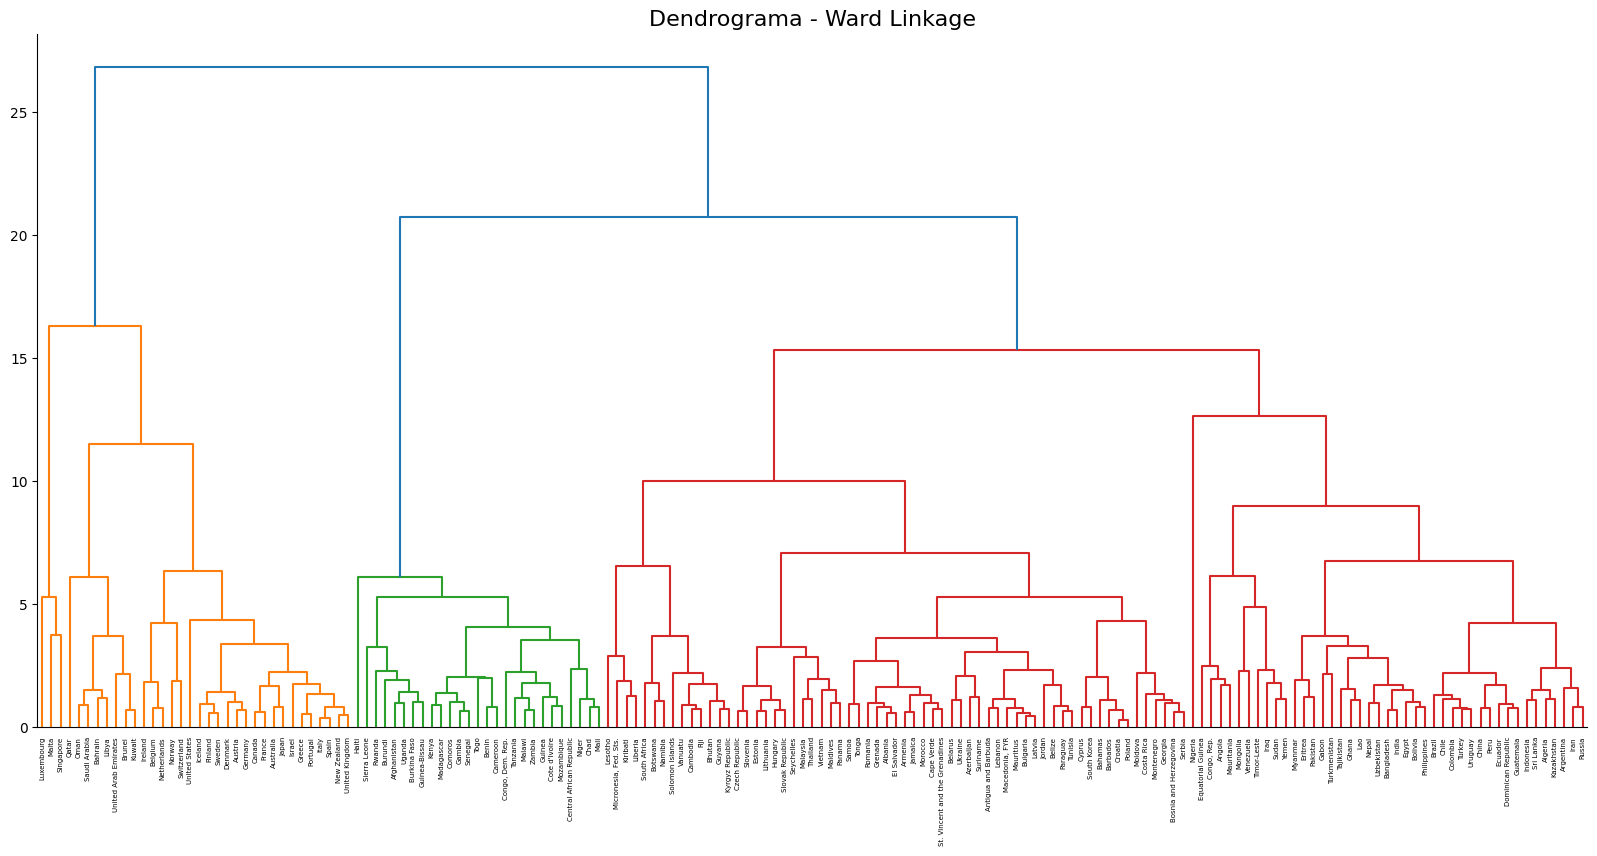

In [43]:
f, ax = plt.subplots(figsize=(20, 9))

hierarchy.dendrogram(
    ward_linkage,
    labels=df_padronized['country'].values,
    ax=ax,
    orientation='top',
    distance_sort=True,
    # truncate_mode='lastp',
)

ax.set_title('Dendrograma - Ward Linkage', fontsize=16)

sns.despine()
plt.show()

In [44]:
cluster_ward_linkage = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_ward_linkage.fit(df_padronized[numeric_cols])

AgglomerativeClustering(n_clusters=3)

In [45]:
df_padronized['cluster_ward_linkage'] = cluster_ward_linkage.labels_
df_padronized['cluster_ward_linkage'].value_counts()

cluster_ward_linkage
1    106
0     34
2     27
Name: count, dtype: int64

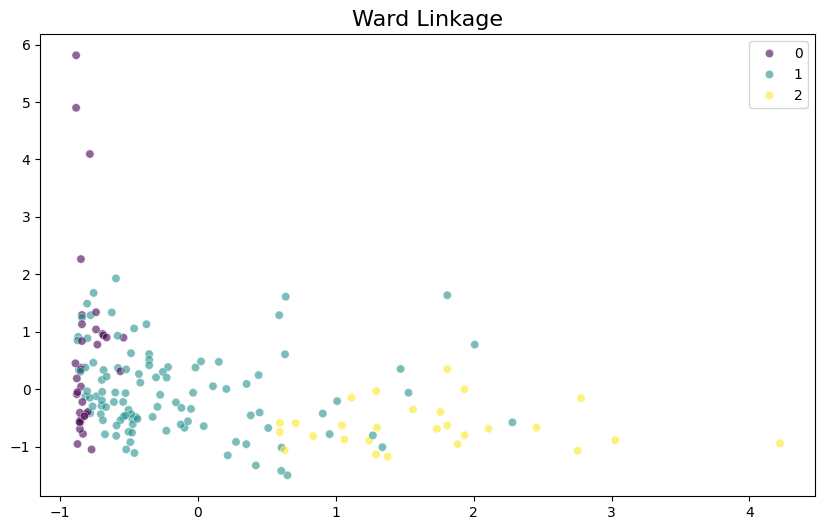

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x=data_scaled[:,0], y=data_scaled[:,1], hue=cluster_ward_linkage.labels_, palette='viridis', alpha=0.6, ax=ax)
ax.set_title('Ward Linkage', fontsize=16)

plt.show()

In [55]:
# Visualizar mapa
fig = px.choropleth(
    df_padronized,
    locations='country',
    locationmode='country names',
    color='cluster_ward_linkage',
    hover_name='country',
    hover_data={
        'cluster_ward_linkage': True,
        'income': ':,.0f',
        'gdpp': ':,.0f',
        'child_mort': ':.1f',
        'life_expec': ':.1f',
        'health': ':.1f'
    },
    color_continuous_scale='Viridis',
    title='<b>Clustering de Países - Ward Linkage</b>',
    labels={'cluster_ward_linkage': 'Cluster'}
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        coastlinecolor='white',
        projection_type='natural earth',
        bgcolor='rgba(0,0,0,0)'
    ),
    width=1000,
    height=600,
    font=dict(size=14),
    title_x=0.5
)

fig.show()

# Análise dos clusters
print("\n" + "="*70)
print("ANÁLISE DOS CLUSTERS - Ward Linkage")
print("="*70)

for i in sorted(df_padronized['cluster_ward_linkage'].unique()):
    cluster_df = df_padronized[df_padronized['cluster_ward_linkage'] == i]
    n_countries = len(cluster_df)
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {i} - {n_countries} países ({n_countries/len(df_padronized)*100:.1f}%)")
    print(f"{'='*70}")
    
    if 'country' in df_padronized.columns:
        print(f"\nPaíses:")
        countries = cluster_df['country'].tolist()
        for j in range(0, len(countries), 5):
            print(f"  {', '.join(countries[j:j+5])}")
    
    print(f"\nMédias das variáveis:")
    print(cluster_df[numeric_cols].mean().round(2))

C:\Users\caahs\AppData\Local\Temp\ipykernel_4060\224676866.py:2: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.




ANÁLISE DOS CLUSTERS - Ward Linkage

CLUSTER 0 - 34 países (20.4%)

Países:
  Australia, Austria, Bahrain, Belgium, Brunei
  Canada, Denmark, Finland, France, Germany
  Greece, Iceland, Ireland, Israel, Italy
  Japan, Kuwait, Libya, Luxembourg, Malta
  Netherlands, New Zealand, Norway, Oman, Portugal
  Qatar, Saudi Arabia, Singapore, Spain, Sweden
  Switzerland, United Arab Emirates, United Kingdom, United States

Médias das variáveis:
child_mort   -0.80
exports       0.64
health        0.62
imports       0.08
income        1.58
inflation    -0.35
life_expec    1.06
total_fer    -0.70
gdpp          1.65
dtype: float64

CLUSTER 1 - 106 países (63.5%)

Países:
  Albania, Algeria, Angola, Antigua and Barbuda, Argentina
  Armenia, Azerbaijan, Bahamas, Bangladesh, Barbados
  Belarus, Belize, Bhutan, Bolivia, Bosnia and Herzegovina
  Botswana, Brazil, Bulgaria, Cambodia, Cape Verde
  Chile, China, Colombia, Congo, Rep., Costa Rica
  Croatia, Cyprus, Czech Republic, Dominican Republic, Ecuad

# K-Medóides

In [48]:
from sklearn.metrics import pairwise_distances_argmin_min

medoid_indices = pairwise_distances_argmin_min(kmeans.cluster_centers_, data_scaled)[0]
medoids = data_scaled[medoid_indices]
df_padronized['cluster_kmedoids'] = kmeans.labels_

print("="*70)
print("MEDÓIDES")

for i in range(3):
    print(f"\n{'='*70}")
    print(f"CLUSTER {i}")
    medoid_idx = medoid_indices[i]
    print(f"  País: {df_padronized.iloc[medoid_idx]['country']}")

print(f"\n{'='*70}")

MEDÓIDES

CLUSTER 0
  País: Suriname

CLUSTER 1
  País: Iceland

CLUSTER 2
  País: Guinea



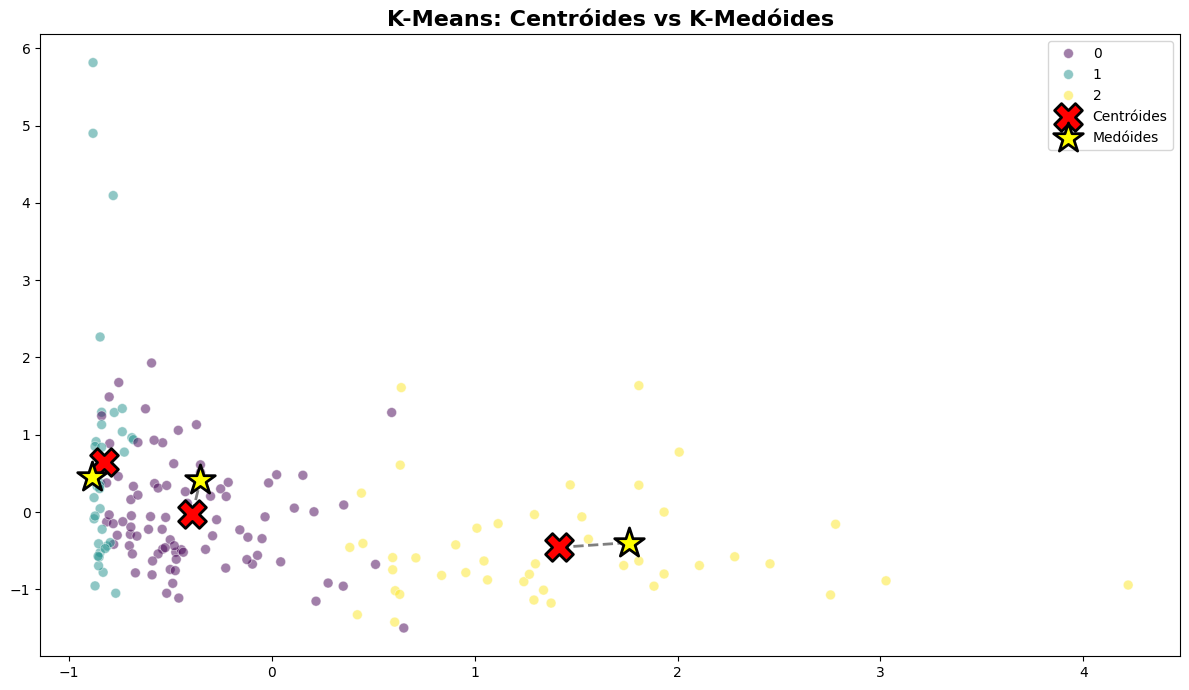

In [49]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.scatterplot(x=data_scaled[:,0], y=data_scaled[:,1], hue=kmeans.labels_, 
                palette='viridis', alpha=0.5, ax=ax, s=50)

# Plotar centróides
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
           marker='X', s=400, color='red', edgecolors='black', linewidths=2,
           label='Centróides', zorder=5)

# Plotar medóides
ax.scatter(medoids[:,0], medoids[:,1], 
           marker='*', s=500, color='yellow', edgecolors='black', linewidths=2,
           label='Medóides', zorder=6)

# Conectar centróides aos medóides com linhas
for i in range(3):
    ax.plot([kmeans.cluster_centers_[i,0], medoids[i,0]], 
            [kmeans.cluster_centers_[i,1], medoids[i,1]], 
            'k--', alpha=0.5, linewidth=2)

ax.set_title('K-Means: Centróides vs K-Medóides', fontsize=16, fontweight='bold')
ax.legend(loc='best')

plt.tight_layout()
plt.show()

# Comparação e Informações

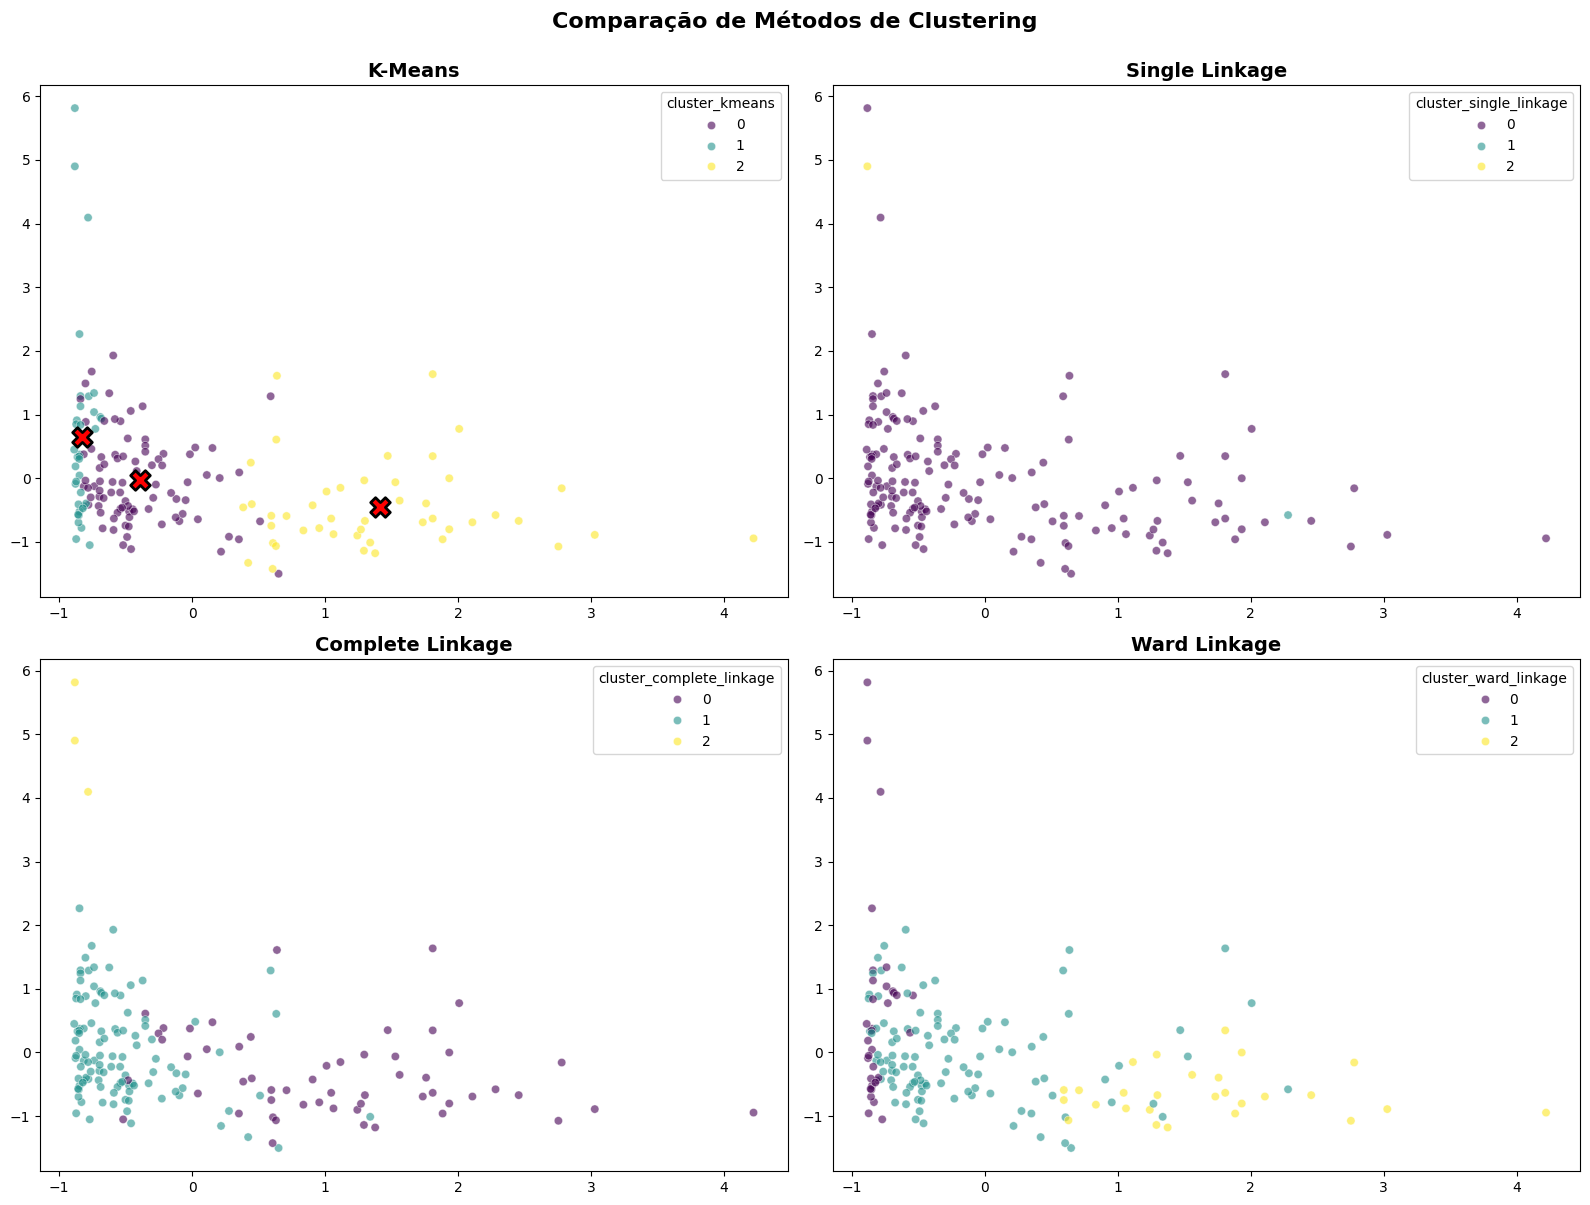


TABELA COMPARATIVA - Distribuição de Países por Cluster
   K-Means  Single  Complete  Ward
0       86     165        55    34
1       36       1       109   106
2       45       1         3    27



In [50]:
# Comparação visual de todos os métodos de clustering
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# K-Means
sns.scatterplot(x=data_scaled[:,0], y=data_scaled[:,1], hue=df_padronized['cluster_kmeans'], 
                palette='viridis', alpha=0.6, ax=axes[0], legend=True)
axes[0].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
                marker='X', s=200, color='red', edgecolors='black', linewidths=2)
axes[0].set_title('K-Means', fontsize=14, fontweight='bold')

# Single Linkage
sns.scatterplot(x=data_scaled[:,0], y=data_scaled[:,1], hue=df_padronized['cluster_single_linkage'], 
                palette='viridis', alpha=0.6, ax=axes[1], legend=True)
axes[1].set_title('Single Linkage', fontsize=14, fontweight='bold')

# Complete Linkage
sns.scatterplot(x=data_scaled[:,0], y=data_scaled[:,1], hue=df_padronized['cluster_complete_linkage'], 
                palette='viridis', alpha=0.6, ax=axes[2], legend=True)
axes[2].set_title('Complete Linkage', fontsize=14, fontweight='bold')

# Ward Linkage
sns.scatterplot(x=data_scaled[:,0], y=data_scaled[:,1], hue=df_padronized['cluster_ward_linkage'], 
                palette='viridis', alpha=0.6, ax=axes[3], legend=True)
axes[3].set_title('Ward Linkage', fontsize=14, fontweight='bold')

plt.suptitle('Comparação de Métodos de Clustering', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Tabela comparativa de distribuição dos clusters
print("\n" + "="*80)
print("TABELA COMPARATIVA - Distribuição de Países por Cluster")
print("="*80)

comparison_df = pd.DataFrame({
    'K-Means': df_padronized['cluster_kmeans'].value_counts().sort_index(),
    'Single': df_padronized['cluster_single_linkage'].value_counts().sort_index(),
    'Complete': df_padronized['cluster_complete_linkage'].value_counts().sort_index(),
    'Ward': df_padronized['cluster_ward_linkage'].value_counts().sort_index()
})

print(comparison_df.head())
print("\n" + "="*80)

## Interpretação Detalhada K-Means

Análise da distribuição das dimensões em cada cluster dos métodos K-Means e Ward Linkage.

In [51]:
print("="*80)
print("INTERPRETAÇÃO DOS CLUSTERS - K-MEANS")
print("="*80)

for i in sorted(df_padronized['cluster_kmeans'].unique()):
    cluster_df = df_padronized[df_padronized['cluster_kmeans'] == i]
    n_countries = len(cluster_df)
    
    print(f"\n{'='*80}")
    print(f"CLUSTER {i} - {n_countries} países ({n_countries/len(df_padronized)*100:.1f}%)")
    print(f"{'='*80}")
    
    # Médias das variáveis
    means = cluster_df[numeric_cols].mean()
    
    print("\nDistribuição das Dimensões (valores padronizados):")
    print("-" * 80)
    for col in numeric_cols:
        value = means[col]
        if value > 0.5:
            nivel = "ALTO"
        elif value > 0:
            nivel = "Moderadamente alto"
        elif value > -0.5:
            nivel = "Moderadamente baixo"
        else:
            nivel = "BAIXO"
        print(f"  {col:15s}: {value:6.2f}  [{nivel}]")
    
    # Exemplos de países
    print(f"\nExemplos de países: {', '.join(cluster_df['country'].head(5).tolist())}")

print("\n" + "="*80)

INTERPRETAÇÃO DOS CLUSTERS - K-MEANS

CLUSTER 0 - 86 países (51.5%)

Distribuição das Dimensões (valores padronizados):
--------------------------------------------------------------------------------
  child_mort     :  -0.39  [Moderadamente baixo]
  exports        :  -0.03  [Moderadamente baixo]
  health         :  -0.21  [Moderadamente baixo]
  imports        :   0.02  [Moderadamente alto]
  income         :  -0.25  [Moderadamente baixo]
  inflation      :  -0.01  [Moderadamente baixo]
  life_expec     :   0.23  [Moderadamente alto]
  total_fer      :  -0.40  [Moderadamente baixo]
  gdpp           :  -0.36  [Moderadamente baixo]

Exemplos de países: Albania, Algeria, Antigua and Barbuda, Argentina, Armenia

CLUSTER 1 - 36 países (21.6%)

Distribuição das Dimensões (valores padronizados):
--------------------------------------------------------------------------------
  child_mort     :  -0.83  [BAIXO]
  exports        :   0.65  [ALTO]
  health         :   0.73  [ALTO]
  imports     

### Interpretação K-Means

**CLUSTER 0 - Países em Desenvolvimento Intermediário (51.5%)**

Características principais:
- Mortalidade infantil e gastos com saúde abaixo da média, mas não críticos
- Expectativa de vida ligeiramente acima da média (transição demográfica)
- Taxa de fertilidade abaixo da média (indicador de desenvolvimento)
- Economia limitada (renda e GDP per capita abaixo da média)
- Inflação controlada

**Perfil:** Países emergentes em transição socioeconômica, com indicadores de saúde melhorando mas economia ainda limitada. Exemplos: Brasil, China, Turquia, Tailândia, Rússia.

---

**CLUSTER 1 - Países Desenvolvidos (21.6%)**

Características principais:
- Mortalidade infantil muito baixa e altos gastos com saúde
- Expectativa de vida muito alta
- Renda per capita e GDP muito altos
- Alto volume de exportações
- Taxa de fertilidade muito baixa (típico de países desenvolvidos)
- Inflação muito controlada

**Perfil:** Países altamente desenvolvidos com economias avançadas, excelentes indicadores de saúde e qualidade de vida. Exemplos: EUA, Alemanha, Japão, Canadá, países nórdicos.

---

**CLUSTER 2 - Países de Baixo Desenvolvimento (26.9%)**

Características principais:
- Mortalidade infantil muito alta
- Expectativa de vida muito baixa
- Renda per capita e GDP muito baixos
- Taxa de fertilidade muito alta
- Inflação elevada (instabilidade econômica)
- Baixo volume de comércio exterior

**Perfil:** Países menos desenvolvidos com graves problemas socioeconômicos e de saúde pública. Alta pobreza, mortalidade e natalidade. Exemplos: Afeganistão, Chade, Mali, Níger, Haiti.